# *Import libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
# Load the cleaned dataset
df = pd.read_csv("d:\\Volume E\\project\\FRAUD-DETECTION-ML\\data\\processed\\cleaned_data.csv")

# *Step 1: Handling Outliers*

In [3]:
# Using IQR method to remove extreme outliers in 'Amount'
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]


# *Step 2: Feature Scaling*

In [4]:
# Standardizing the 'Amount' column using RobustScaler (better for handling outliers)
scaler = RobustScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# *Step 3: Class Imbalance Handling*

In [5]:
# Using SMOTE (Synthetic Minority Over-sampling Technique) to balance fraud cases
X = df.drop(columns=['Class'])
y = df['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)

# *Step 4: Feature Selection*

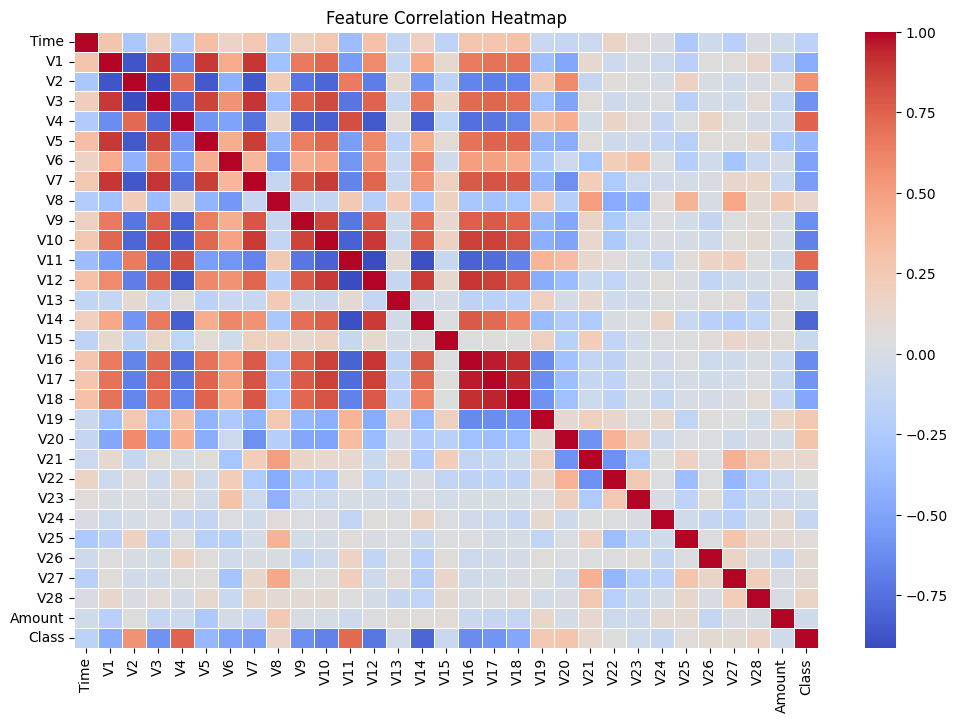

In [6]:
# Visualizing correlation to identify redundant features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# *Step 5: Saving Processed Data*

In [7]:
# Saving the transformed dataset for model training
df.to_csv("d:\\Volume E\\project\\FRAUD-DETECTION-ML\\data\\processed\\feature_engineered_data.csv", index=False)

print("Feature Engineering completed and data saved successfully!")

Feature Engineering completed and data saved successfully!
